##### Import of libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

##### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [6]:
df = pd.read_csv("fcc-forum-pageviews.csv", sep = ",")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [7]:
# Indexing the Date column
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col="date", sep = ",")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


##### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [8]:
# checking for null values
df.isna().sum()

value    0
dtype: int64

In [9]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


##### Create a function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be . The label on the x axis should be and the label on the y axis should be .draw_line_plot Daily freeCodeCamp Forum Page Views 5/2016-12/2019 Date Page Views

In [26]:
def draw_line_plot():
    # Draw line plot
    fig , ax = plt.subplots(1,1, figsize = (19,5))
    df.plot(ax=ax)
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    fig.savefig('line_plot.png')
    return fig

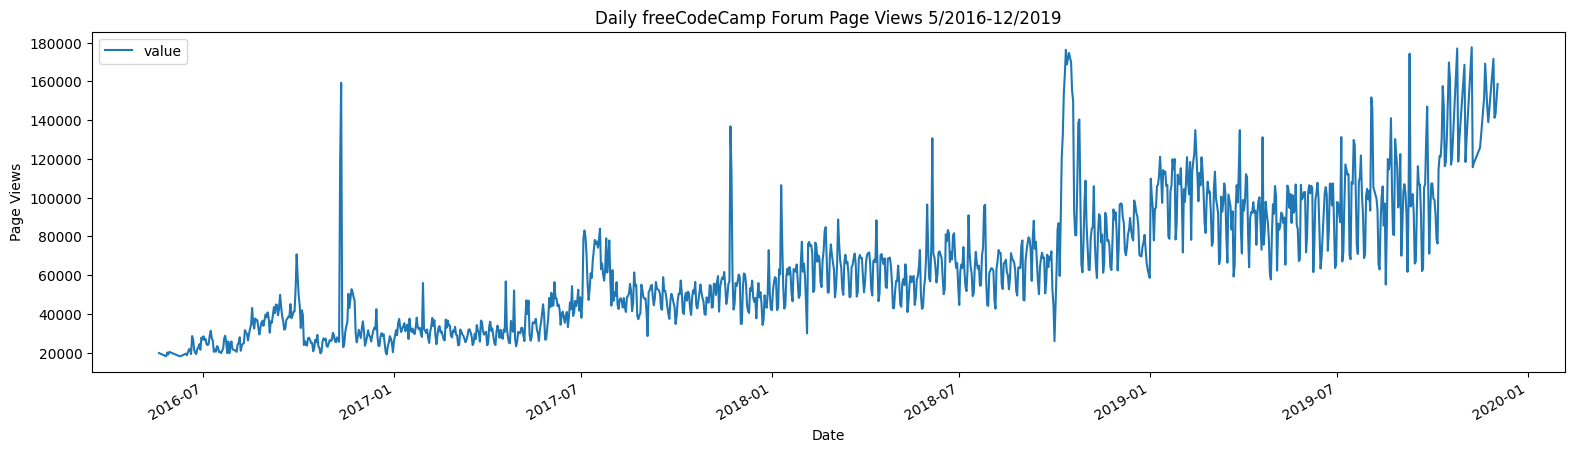

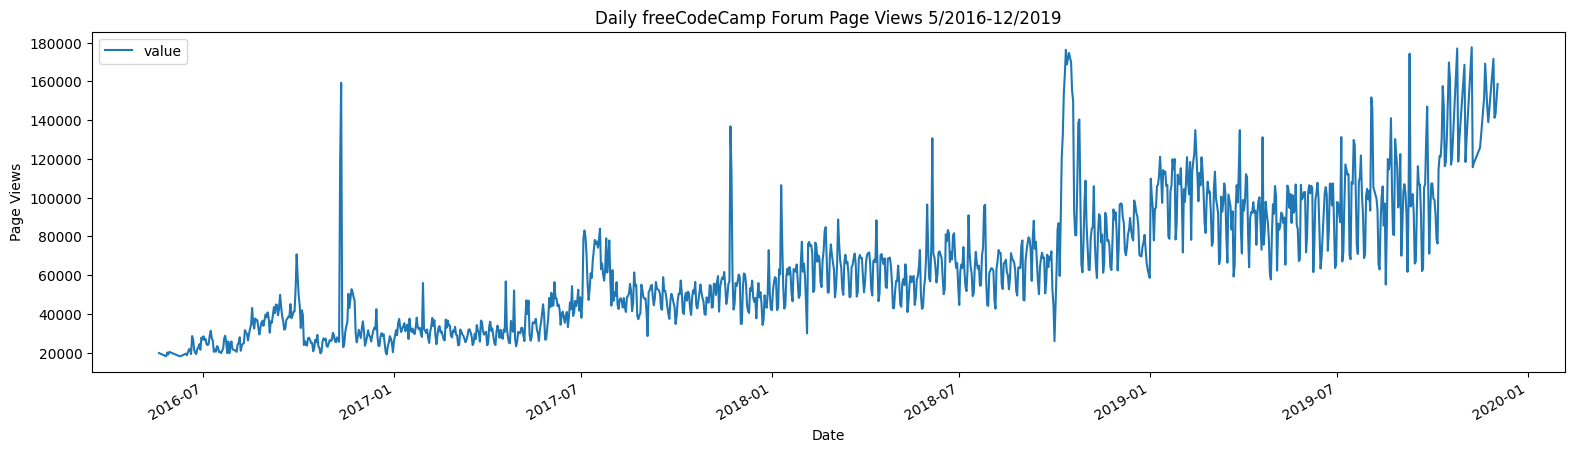

In [27]:
draw_line_plot()

##### Create a function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of . On the chart, the label on the x axis should be and the label on the y axis should be .draw_bar_plot Months Years Average Page Views

In [25]:
# Create a copy of the previous dataframe and add two new columns one for the month and one for the year
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['Month'] = df_bar.index.strftime('%B')
df_bar

,value,year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [30]:
# We created the function that makes the bar graphs with seaborn
def draw_bar_plot():
    mes = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    # Draw bar plot
    sns.set_style("ticks")
    # , palette="rocket"
    g = sns.catplot( x="year", kind="bar", hue="Month", y = "value", data=df_bar, hue_order= mes, ci=None, legend=False, palette="hls")
    fig = g.fig
    ax = g.ax
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    plt.legend(loc='upper left', title="Month")
    plt.ylim(0,140000)
    fig.savefig('bar_plot.png')
    return fig

C:\Users\Eloy Armao\AppData\Local\Temp\ipykernel_2764\4076692391.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot( x="year", kind="bar", hue="Month", y = "value", data=df_bar, hue_order= mes, ci=None, legend=False, palette="hls")


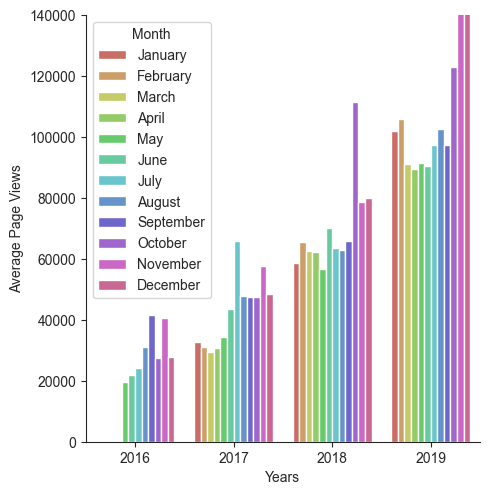

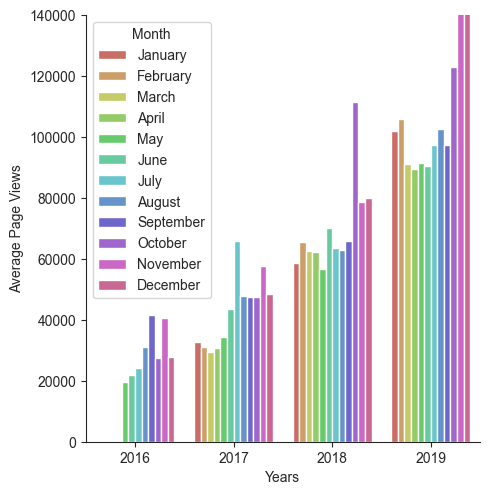

In [31]:
draw_bar_plot()

##### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [40]:
#We create a copy of the previous dataframe, sort the values of the column "year" in descending form and the column "date" in ascending form, in addition, we change the name of the column "Month" to "month"
df_box = df_bar.copy()
df_box.sort_values(by=['year','date'], ascending=[False, True], inplace=True)
df_box.rename(columns = {"Month": "month"}, inplace = True)
df_box

,value,year,month
date,,,
2019-01-01,58508,2019,January
2019-01-02,109708,2019,January
2019-01-03,100710,2019,January
2019-01-04,94514,2019,January
2019-01-05,77897,2019,January
...,...,...,...
2016-12-27,25138,2016,December
2016-12-28,28424,2016,December
2016-12-29,27197,2016,December


In [41]:
# added new columns "Page Views", "Month", "Year", with the values of the columns "value", "year" and "mont" respectively
df_box["Page Views"] = df_box["value"]
df_box["Month"] = df_box["month"]
df_box["Year"] = df_box["year"]
df_box

,value,year,month,Page Views,Month,Year
date,,,,,,
2019-01-01,58508,2019,January,58508,January,2019
2019-01-02,109708,2019,January,109708,January,2019
2019-01-03,100710,2019,January,100710,January,2019
2019-01-04,94514,2019,January,94514,January,2019
2019-01-05,77897,2019,January,77897,January,2019
...,...,...,...,...,...,...
2016-12-27,25138,2016,December,25138,December,2016
2016-12-28,28424,2016,December,28424,December,2016
2016-12-29,27197,2016,December,27197,December,2016


In [43]:
# We created the function to graph the boxes with seaborn
def draw_box_plot():    
    fig = plt.figure(figsize =(15,8))
    plt.subplot(1,2,1, title = "Year-wise Box Plot (Trend)")
    sns.boxplot(data=df_box, x = "Year", y = "value")
    plt.ylabel("Page Views")
    plt.ylim(0,200000)
    plt.subplot(1,2,2, title = "Month-wise Box Plot (Seasonality)")
    sns.boxplot(data=df_box, x = "Month", y = "value")
    plt.ylabel("Page Views")
    plt.ylim(0,200000)

    fig.savefig('box_plot.png')
    return fig

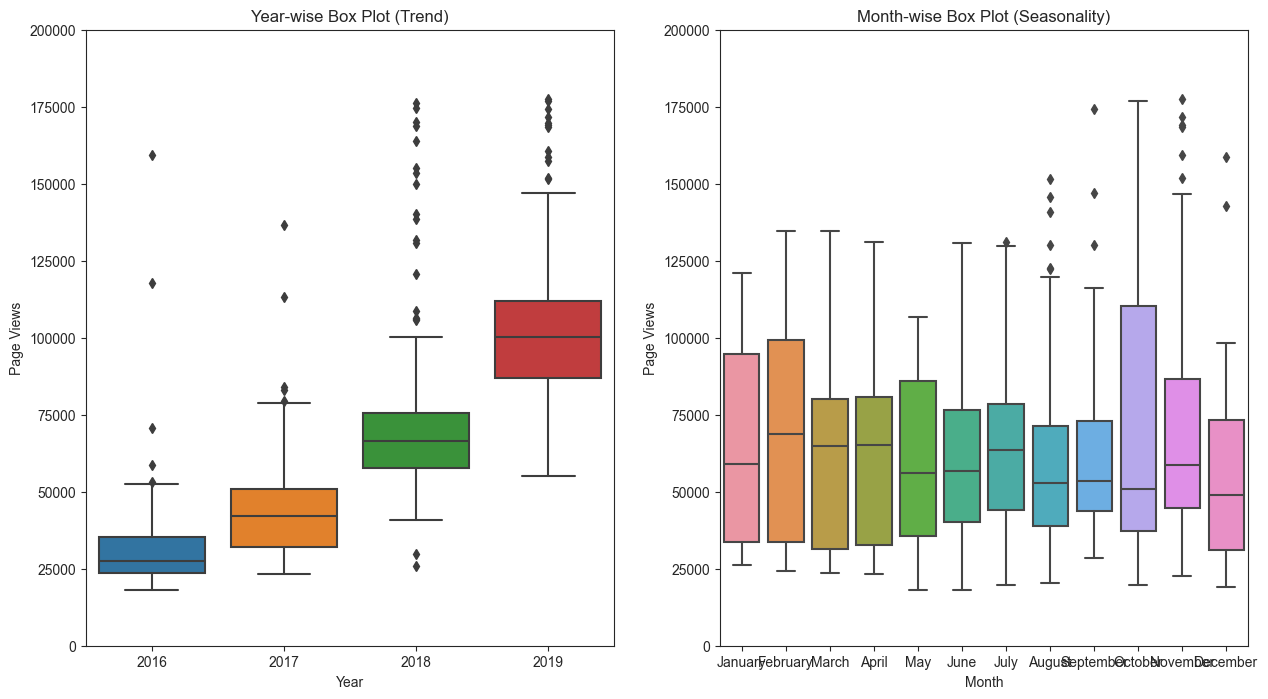

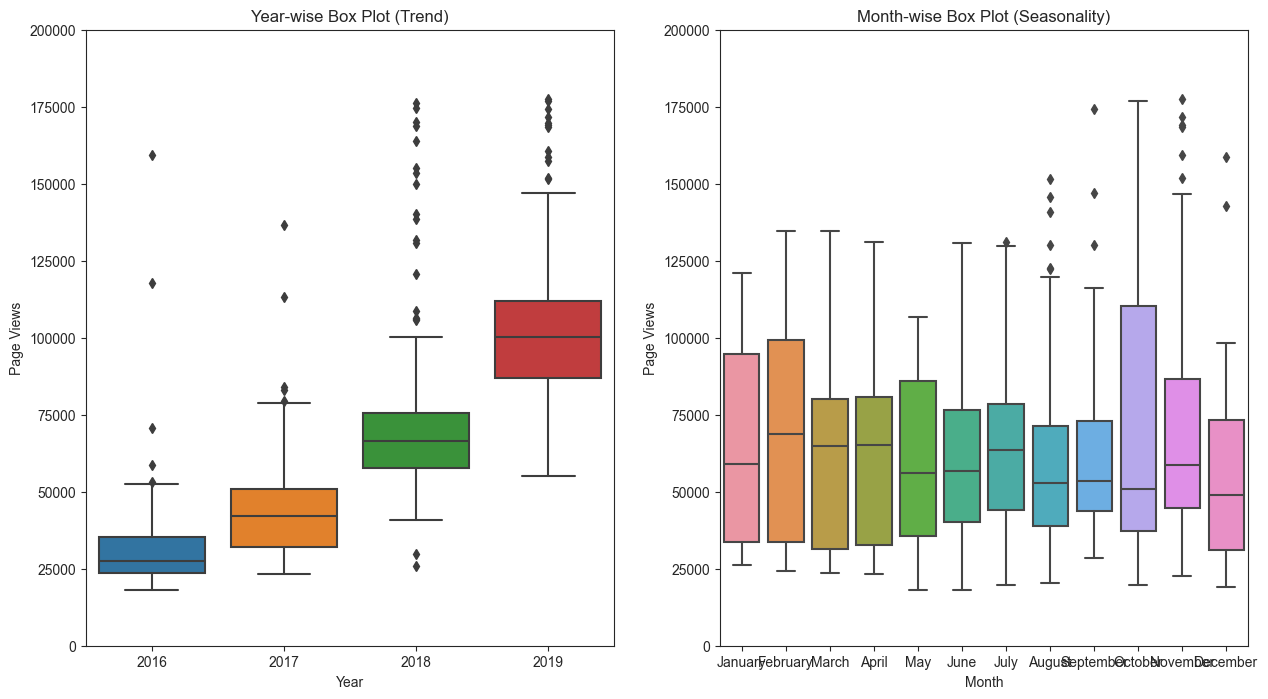

In [44]:
draw_box_plot()